# Naive Bayesian - Gaussian - Lab
===Task===

1. Generate a 2 class data using sklearn.
2. Put Gaussian Naive Bayesian Classification into class
3. Fit the model on the data then calculate accuracy accordingly.

#### st122645 Pyae Sone

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, classification_report


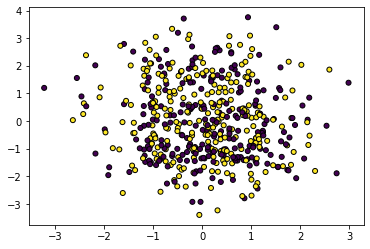

In [41]:
X, y = make_classification(n_samples=500, n_features=10, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# look at the data...it is likely not linearly separable!

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
class NaiveGaussian_Binary():
    
    def fit(self, X_train, y_train): # fit the data with X_train and y_train
        
        n = X_train.shape[1]
        mean = np.zeros((2, n))
        std = np.zeros((2, n))
        for label in [0, 1]:
            mean[label, :] = X_train[y_train==label].mean(axis=0)
            std[label, :]  = X_train[y_train==label].std(axis=0)
        return mean, std

        mean, std = fit(X_train, y_train)
        assert mean.shape == (2, X_train.shape[1])
        assert std.shape == (2, X_train.shape[1])
        
    def gaussian_pdf(self, X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right
        
    def predict(self, X_test):
        
        likelihood0 = gaussian_pdf(X_test, mean[0, :], std[0, :])
        likelihood1 = gaussian_pdf(X_test, mean[1, :], std[0, :])

        print(likelihood0.shape)

        assert likelihood0.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf0!"
        assert likelihood1.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf1!"

                        # np.product
        # P(feature1|class0) * P(feature2|class0)
        total_likelihood0 = np.prod(likelihood0, axis=1)

        # P(feature1|class1) * P(feature2|class1)
        total_likelihood1 = np.prod(likelihood1, axis=1)

        print(total_likelihood0.shape)
        # probability for class 0 and 1
        m0 = len(X_train[y_train==0])
        m1 = len(X_train[y_train==1])
        prior0 = m0 / (m0 + m1)
        prior1 = m1 / (m0 + m1)
        print(prior0)
        print(prior1)    
        assert prior0 + prior1 == 1, "probability not equal 1"
            # P(class0) * P(feature1|class0) * P(feature2|class0)
        posterior0 = prior0 * total_likelihood0    
            # P(class1) * P(feature1|class1) * P(feature2|class1)
        posterior1 = prior1 * total_likelihood1

        return yhat


In [47]:
model = NaiveGaussion_Binary()
model.fit(X_train, y_train)
yhat = model.predict(X_test)

NameError: name 'NaiveGaussion_Binary' is not defined

In [48]:

print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.5472802051579813
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.43      0.43      0.43        67
           1       0.54      0.54      0.54        83

    accuracy                           0.49       150
   macro avg       0.49      0.49      0.49       150
weighted avg       0.49      0.49      0.49       150

